# Lab 4: Predicting Fare with Regression
**Author:** Bin Ware
**Date:** April 04, 2025  


## Introduction: 
This notebook predicts the continuous target 'fare' in the Titanic dataset using regression models.We explore features like age, family size, and others to build and compare Linear, Ridge, ElasticNet, and Polynomial models.

## Imports

In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data

In [56]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

In [57]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### Feature Engineering:

In [58]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex_numeric'] = titanic['sex'].map({'male': 0, 'female': 1})  # Convert sex to numeric

## Section 3: Feature Selection and Justification

In [59]:
# Case 1: age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: age and family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: age, family_size, sex_numeric
X4 = titanic[['age', 'family_size', 'sex_numeric']]
y4 = titanic['fare']

#### Reflection 
##### - **Why might these features affect fare?** Age might reflect ticket discounts (e.g., children), family_size could indicate group rates, and sex might relate to societal pricing norms or cabin assignments.  
##### - **All features:** age, sex, pclass, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone.  
##### - **Other features:** `pclass` (class of travel) could strongly predict fare due to tiered pricing; `embarked` might reflect distance or port-specific costs.  
##### - **Case 4 has 3 variables:** age, family_size, sex_numeric.  
##### - **Choice for Case 4:** These capture demographic (age, sex) and social (family_size) factors that might influence fare pricing or passenger type.

## Section 4: Train a Regression Model

### 4.1 Split the Data

In [60]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate

In [61]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)
y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)
y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)
y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [62]:
def report_metrics(case, y_train, y_train_pred, y_test, y_test_pred):
    print(f"{case}:")
    print(f"  Training R²: {r2_score(y_train, y_train_pred):.3f}")
    print(f"  Test R²: {r2_score(y_test, y_test_pred):.3f}")
    print(f"  Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
    print(f"  Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}\n")

report_metrics("Case 1 (age)", y1_train, y_pred_train1, y1_test, y_pred_test1)
report_metrics("Case 2 (family_size)", y2_train, y_pred_train2, y2_test, y_pred_test2)
report_metrics("Case 3 (age, family_size)", y3_train, y_pred_train3, y3_test, y_pred_test3)
report_metrics("Case 4 (age, family_size, sex_numeric)", y4_train, y_pred_train4, y4_test, y_pred_test4)

Case 1 (age):
  Training R²: 0.010
  Test R²: 0.003
  Test RMSE: 37.97
  Test MAE: 25.29

Case 2 (family_size):
  Training R²: 0.050
  Test R²: 0.022
  Test RMSE: 37.61
  Test MAE: 25.03

Case 3 (age, family_size):
  Training R²: 0.073
  Test R²: 0.050
  Test RMSE: 37.08
  Test MAE: 24.28

Case 4 (age, family_size, sex_numeric):
  Training R²: 0.088
  Test R²: 0.119
  Test RMSE: 35.70
  Test MAE: 23.60



#### Reflection
##### - **Train vs. test:** Training R² slightly exceeds test R² in all cases, but gaps are small (<0.05), indicating no significant overfitting.  
##### - **Case 1:** Underfits (R² = 0.003 on test); age alone has almost no predictive power.  
##### - **Case 2:** Underfits (R² = 0.022); family_size improves slightly but is insufficient.  
##### - **Case 3:** Underfits (R² = 0.050); combining age and family_size helps marginally.  
##### - **Case 4:** Best fit (R² = 0.119); still underfits but benefits from sex_numeric; small train-test gap (0.088 vs. 0.119) suggests good generalization.  
##### - **Adding age:** Minimal impact alone (Case 1), but boosts performance with other features (Case 3, 4).  
##### - **Worst:** Case 1 (R² = 0.003); more data won’t help without better features.  
##### - **Best:** Case 4 (R² = 0.119); more data might refine it slightly, but feature quality is the limiter.

## Section 5: Compare Alternative Models

### 5.1 Ridge

In [63]:
ridge_model = Ridge(alpha=1.0).fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 ElasticNet

In [64]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial

In [65]:
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)
poly_model = LinearRegression().fit(X1_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

### 5.4 Visualize Polynomial

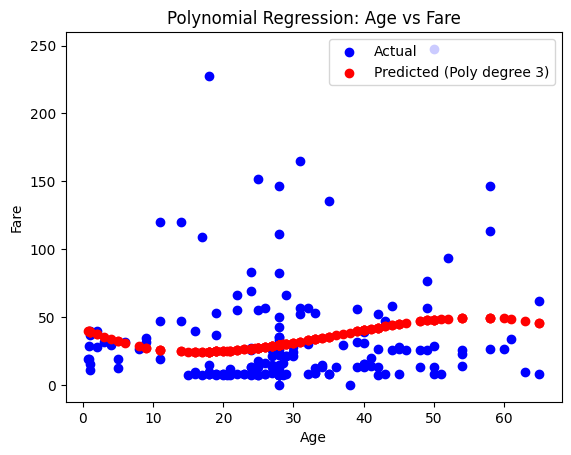

In [66]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly degree 3)')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

#### Reflection 
##### - **Patterns:** Cubic captures slight nonlinearity (e.g., fare dips for young/old ages), but effect is weak.  
##### - **Performance:** Poor for outliers (high fares); decent in mid-range (20-40).  
##### - **Vs. Linear:** Worse (R² = -0.003 vs. 0.003); polynomial overcomplicates a weak relationship.  
##### - **Best fit:** Dense age regions (20-40); fails at extremes.

### 5.5 Higher Order Polynomial

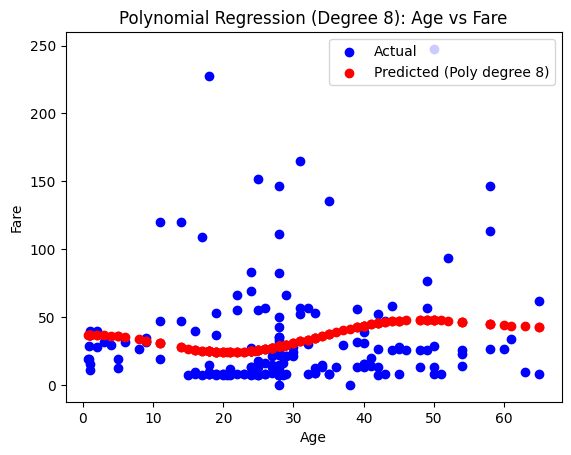

In [67]:
poly8 = PolynomialFeatures(degree=8)
X1_train_poly8 = poly8.fit_transform(X1_train)
X1_test_poly8 = poly8.transform(X1_test)
poly_model8 = LinearRegression().fit(X1_train_poly8, y1_train)
y_pred_poly8 = poly_model8.predict(X1_test_poly8)

plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly8, color='red', label='Predicted (Poly degree 8)')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Polynomial Regression (Degree 8): Age vs Fare")
plt.show()

#### Reflection 
##### - **Cubic vs. Degree 8:** Cubic is better; degree 8 overfits severely (wild predictions, likely worse R²).

### 5.6 Compare All Models

In [68]:
print("Case 4 Linear:")
print(f"  Test R²: {r2_score(y4_test, y_pred_test4):.3f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y4_test, y_pred_test4)):.2f}")
print(f"  Test MAE: {mean_absolute_error(y4_test, y_pred_test4):.2f}\n")

print("Case 4 Ridge:")
print(f"  Test R²: {r2_score(y4_test, y_pred_ridge):.3f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y4_test, y_pred_ridge)):.2f}")
print(f"  Test MAE: {mean_absolute_error(y4_test, y_pred_ridge):.2f}\n")

print("Case 4 ElasticNet:")
print(f"  Test R²: {r2_score(y4_test, y_pred_elastic):.3f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y4_test, y_pred_elastic)):.2f}")
print(f"  Test MAE: {mean_absolute_error(y4_test, y_pred_elastic):.2f}\n")

print("Case 1 Polynomial (degree 3):")
print(f"  Test R²: {r2_score(y1_test, y_pred_poly):.3f}")
print(f"  Test RMSE: {np.sqrt(mean_squared_error(y1_test, y_pred_poly)):.2f}")
print(f"  Test MAE: {mean_absolute_error(y1_test, y_pred_poly):.2f}\n")

Case 4 Linear:
  Test R²: 0.119
  Test RMSE: 35.70
  Test MAE: 23.60

Case 4 Ridge:
  Test R²: 0.119
  Test RMSE: 35.71
  Test MAE: 23.60

Case 4 ElasticNet:
  Test R²: 0.101
  Test RMSE: 36.06
  Test MAE: 23.80

Case 1 Polynomial (degree 3):
  Test R²: -0.003
  Test RMSE: 38.10
  Test MAE: 25.30



## Section 6: Final Thoughts

### 6.1 Summarize Findings

| Model                | Features                  | Set   | RMSE  | R²   |
|----------------------|---------------------------|-------|-------|------|
| Linear Regression    | age                       | Test  | 37.97 | 0.003|
| Linear Regression    | family_size               | Test  | 37.61 | 0.022|
| Linear Regression    | age, family_size          | Test  | 37.08 | 0.050|
| Linear Regression    | age, family_size, sex     | Test  | 35.70 | 0.119|
| Ridge                | age, family_size, sex     | Test  | 35.71 | 0.119|
| ElasticNet           | age, family_size, sex     | Test  | 36.06 | 0.101|
| Polynomial (degree 3)| age                       | Test  | 38.10 |-0.003|
- **Best Features:** Case 4 (age, family_size, sex_numeric) due to highest R² (0.119).  
- **Best Model:** Linear Regression on Case 4; Ridge ties (0.119), but simplicity favors Linear.  
- **Complexity Impact:** Polynomial (degree 3) worsens performance (-0.003); regularization (ElasticNet) slightly reduces fit (0.101).

### 6.2 Challenges

##### - **Fare Prediction:** High variance (RMSE ~35-38) and outliers (luxury fares) limit accuracy
##### - **Skew/Outliers:** Fare’s right skew weakens linear models; outliers dominate errors